# CONTENTS

1. IMPORTING LIBRARIES/DATA

2. DATA OVERVIEW

3. EXPLORATORY VISUAL ANALYSIS

4. RESEARCH QUESTIONS

5. PROSPECTIVE HYPOTHESES

# IMPORTING LIBRARIES/DATA

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# initialize path variable
path = r'/Users/smac_/Documents/Courses/CF Data Analytics Program/Data Immersion/Achievement 6/07-2023 NYC Airbnb Market Analysis'

In [3]:
# import data
df_listings = pd.read_pickle(os.path.join(path, '02 Data', 'Processed Data', 'listings_clean.pkl'))

# DATA OVERVIEW

In [4]:
# first 5 rows
df_listings.head()

,id,host_id,nbhd_group,nbhd,latitude,longitude,room_type,price,min_nights,reviews_count,last_review,monthly_reviews,host_list_count,availability_365,reviews_count_ltm
0,5121,7356,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.29,2,0,0
1,2595,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240,30,49,2022-06-21,0.30,3,325,1
2,14991,59023,Manhattan,Lower East Side,40.72207,-73.98976,Private room,120,5,22,2023-05-14,0.14,1,268,3
3,5136,7378,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,276,21,3,2022-08-10,0.03,1,275,1
4,59709,186084,Manhattan,Chinatown,40.71780,-73.99320,Entire home/apt,325,7,69,2023-04-28,0.47,1,38,23


In [5]:
# last 5 rows
df_listings.tail()

,id,host_id,nbhd_group,nbhd,latitude,longitude,room_type,price,min_nights,reviews_count,last_review,monthly_reviews,host_list_count,availability_365,reviews_count_ltm
43561,905031073149861760,86368678,Brooklyn,Canarsie,40.633458,-73.899472,Entire home/apt,208,3,0,Unavailable,0.0,3,358,0
43562,905038362467988591,52064945,Brooklyn,Park Slope,40.677256,-73.981435,Private room,530,30,0,Unavailable,0.0,1,270,0
43563,905066559607295258,22541573,Manhattan,East Village,40.732530,-73.989880,Entire home/apt,382,30,0,Unavailable,0.0,132,288,0
43564,905077900484113845,151692758,Brooklyn,Canarsie,40.638210,-73.915920,Entire home/apt,199,2,0,Unavailable,0.0,1,155,0
43565,905109354552786380,25138314,Manhattan,Midtown,40.765086,-73.976717,Private room,662,1,0,Unavailable,0.0,116,250,0


In [6]:
# column names & data types
df_listings.dtypes

id                     int64
host_id                int64
nbhd_group            object
nbhd                  object
latitude             float64
longitude            float64
room_type             object
price                  int64
min_nights             int64
reviews_count          int64
last_review           object
monthly_reviews      float64
host_list_count        int64
availability_365       int64
reviews_count_ltm      int64
dtype: object

In [7]:
# dataframe size
df_listings.shape

(43555, 15)

# EXPLORATORY VISUAL ANALYSIS

In [8]:
# initialize subset dataframe containing relevant variables only
df_listings_sub = df_listings[['nbhd_group', 
                               'nbhd', 
                               'room_type', 
                               'price', 
                               'min_nights', 
                               'reviews_count', 
                               'monthly_reviews', 
                               'host_list_count', 
                               'availability_365', 
                               'reviews_count_ltm']]

In [9]:
# generate a dataframe correlation matrix 
df_sub_corr_matrix = df_listings_sub.corr(numeric_only=True)
df_sub_corr_matrix

,price,min_nights,reviews_count,monthly_reviews,host_list_count,availability_365,reviews_count_ltm
price,1.000000,-0.055871,-0.040120,-0.035388,0.065501,0.086299,-0.027005
min_nights,-0.055871,1.000000,-0.154861,-0.274997,0.153499,-0.076239,-0.237368
reviews_count,-0.040120,-0.154861,1.000000,0.608652,-0.121870,0.054059,0.647658
monthly_reviews,-0.035388,-0.274997,0.608652,1.000000,-0.143563,0.156443,0.836760
host_list_count,0.065501,0.153499,-0.121870,-0.143563,1.000000,0.095744,-0.112030
availability_365,0.086299,-0.076239,0.054059,0.156443,0.095744,1.000000,0.123946
reviews_count_ltm,-0.027005,-0.237368,0.647658,0.836760,-0.112030,0.123946,1.000000


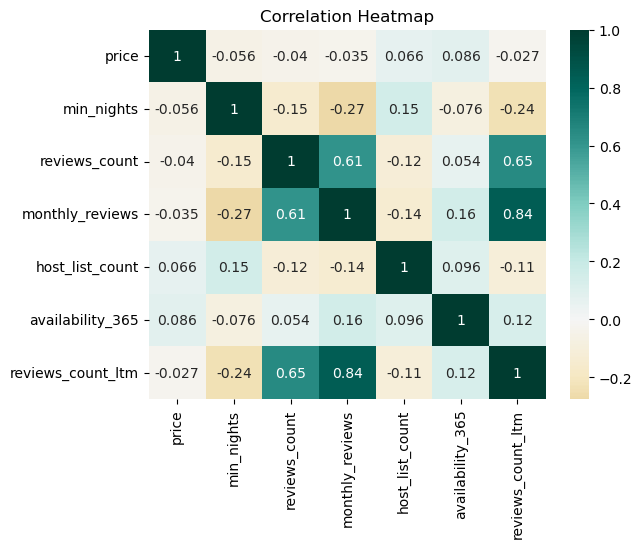

In [10]:
# generate a dataframe correlation heatmap
sns.heatmap(df_sub_corr_matrix, annot=True, cmap='BrBG', center=0)
plt.title('Correlation Heatmap')
plt.show()

### OBSERVATIONS

POSITIVE CORRELATIONS:

1. The variables `'monthly_reviews'` and `'reviews_count_ltm'` exhibit the strongest positive relationship. It is evident that as the number of monthly reviews increases for each listing (`'monthly_reviews'`), the count of reviews in the last 12 months for the same listing (`'reviews_count_ltm'`) also rises. This is a logical and expected relationship.

2. A similar positive relationship is observed between `'reviews_count'` and `'reviews_count_ltm'`. As the total number of reviews for a particular listing (`'reviews_count'`) increases, so does the count of reviews made in the last 12 months (`'reviews_count_ltm'`) for that listing.

3. We also find a moderately strong positive relationship between `'monthly_reviews'` and `'reviews_count'`. Once again, it is understandable that as the number of monthly reviews increases for a listing (`'monthly_reviews'`), the total number of reviews for the same listing (`'reviews_count'`) would also increase.

NEGATIVE CORRELATIONS:

1. The most prominent negative relationship in the dataset pertains to the variables `'min_nights'` and `'monthly_reviews'`. It appears that as the required minimum booked nights for each listing increases (`'min_nights'`), the number of monthly reviews for that listing decreases (`'monthly_reviews'`). Though the strength of this relationship is somewhat weak, it warrants further exploration.

2. The second strongest negative relationship is observed between `'min_nights'` and `'reviews_count_ltm'`. It seems that when the number of minimum booked nights required for a listing decreases (`'min_nights'`), the count of reviews made in the last 12 months (`'reviews_count_ltm'`) increases.

ADDITIONAL NOTE:

In addition to the captivating findings discussed earlier, we noticed that the rest of the variables exhibit very low positive and negative correlations, with most of them falling below the **0.1 mark**. This indicates that there are no other prominent or significant relationships among these variables beyond the ones already explored. It is unfortunate because these variables represent some of the most interesting and important factors to analyze in the dataset. This hightlights the need to employ other analysis techniques to uncover additional insights.


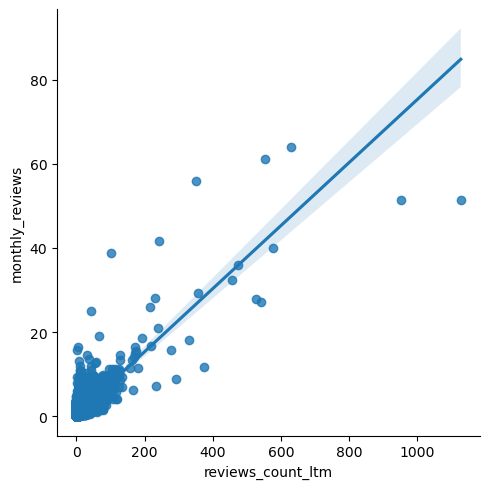

In [11]:
# generate scatterplot crossing 'reviews_count_ltm' & 'monthly_reviews'
sns.lmplot(x='reviews_count_ltm', y='monthly_reviews', data=df_listings_sub)

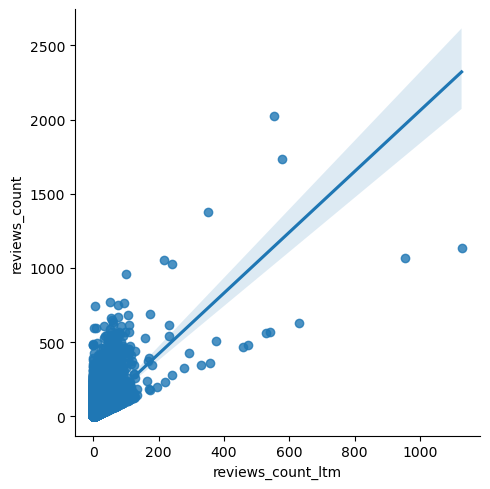

In [12]:
# generate scatterplot crossing 'reviews_count_ltm' & 'reviews_count'
sns.lmplot(x='reviews_count_ltm', y='reviews_count', data=df_listings_sub)

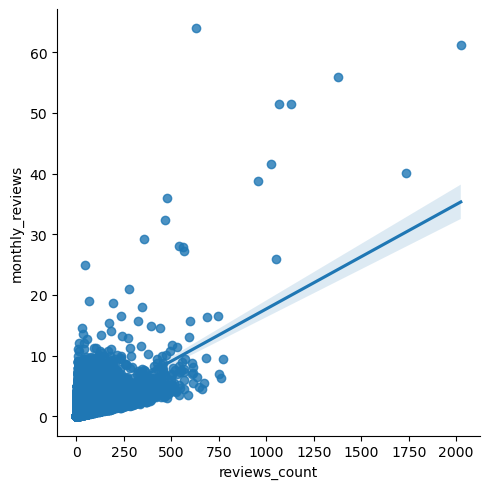

In [13]:
# generate scatterplot crossing 'reviews_count' & 'monthly_reviews'
sns.lmplot(x='reviews_count', y='monthly_reviews', data=df_listings_sub)

The relationship between the two variables in the highest three positive correlations found exhibit a linear trend, displaying low to moderate variability. As depicted in the scatter plot, the majority of data points cluster in the bottom-left corner, while a few outliers are scattered along the trend line. It is worth noting that during the initial exploration of the dataset, these variables presented a considerable proportion of outliers.

The concentration of data points in the bottom-left corner implies that the majority of values fall within a specific range on the scale, which aligns with the observed low variability. The presence of outliers can be attributed to exceptional cases that deviate from the general trend but are still relevant to consider in the analysis.

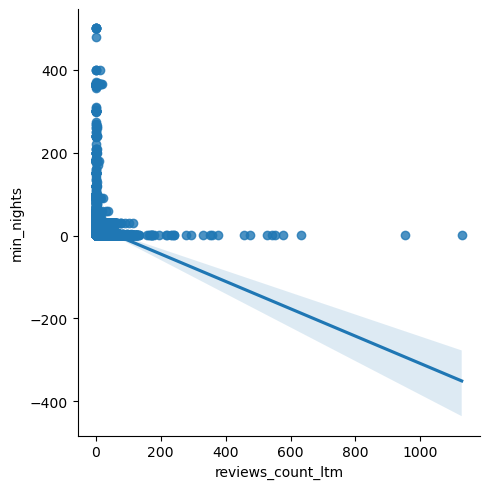

In [14]:
# generate scatterplot crossing 'reviews_count_ltm' & 'min_nights'
sns.lmplot(x='reviews_count_ltm', y='min_nights', data=df_listings_sub)

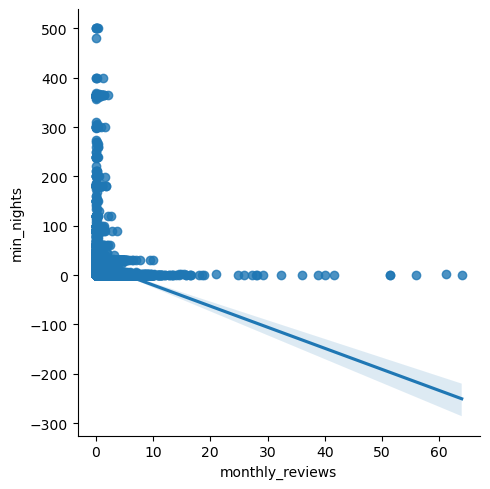

In [15]:
# generate scatterplot crossing 'monthly_reviews' & 'min_nights'
sns.lmplot(x='monthly_reviews', y='min_nights', data=df_listings_sub)

The two variables with the highest negative correlations exhibit a non-linear trend, showcasing a somewhat high degree of variability. Upon examining the scatter plot, we observe that a majority of data points cluster in the bottom-left corner, resembling the patterns seen in the positive relationships discussed earlier. However, there is a notable distinction in the behavior of outliers between the negative and positive relationships.

In the negative relationships, the outliers follow a distinct linear pattern along the axes of the plot. Specifically, when one variable's outliers have a value of zero, the corresponding outliers in the other variable are scattered throughout the entire range, forming an L-shaped pattern in the scatter plot.

The presence of this unique L-shaped pattern among the outliers warrants further exploration to gain a comprehensive understanding of its underlying causes. By delving deeper into the factors that contribute to this distinct behavior, we can unveil crucial insights that might be influencing the negative correlation between these variables.

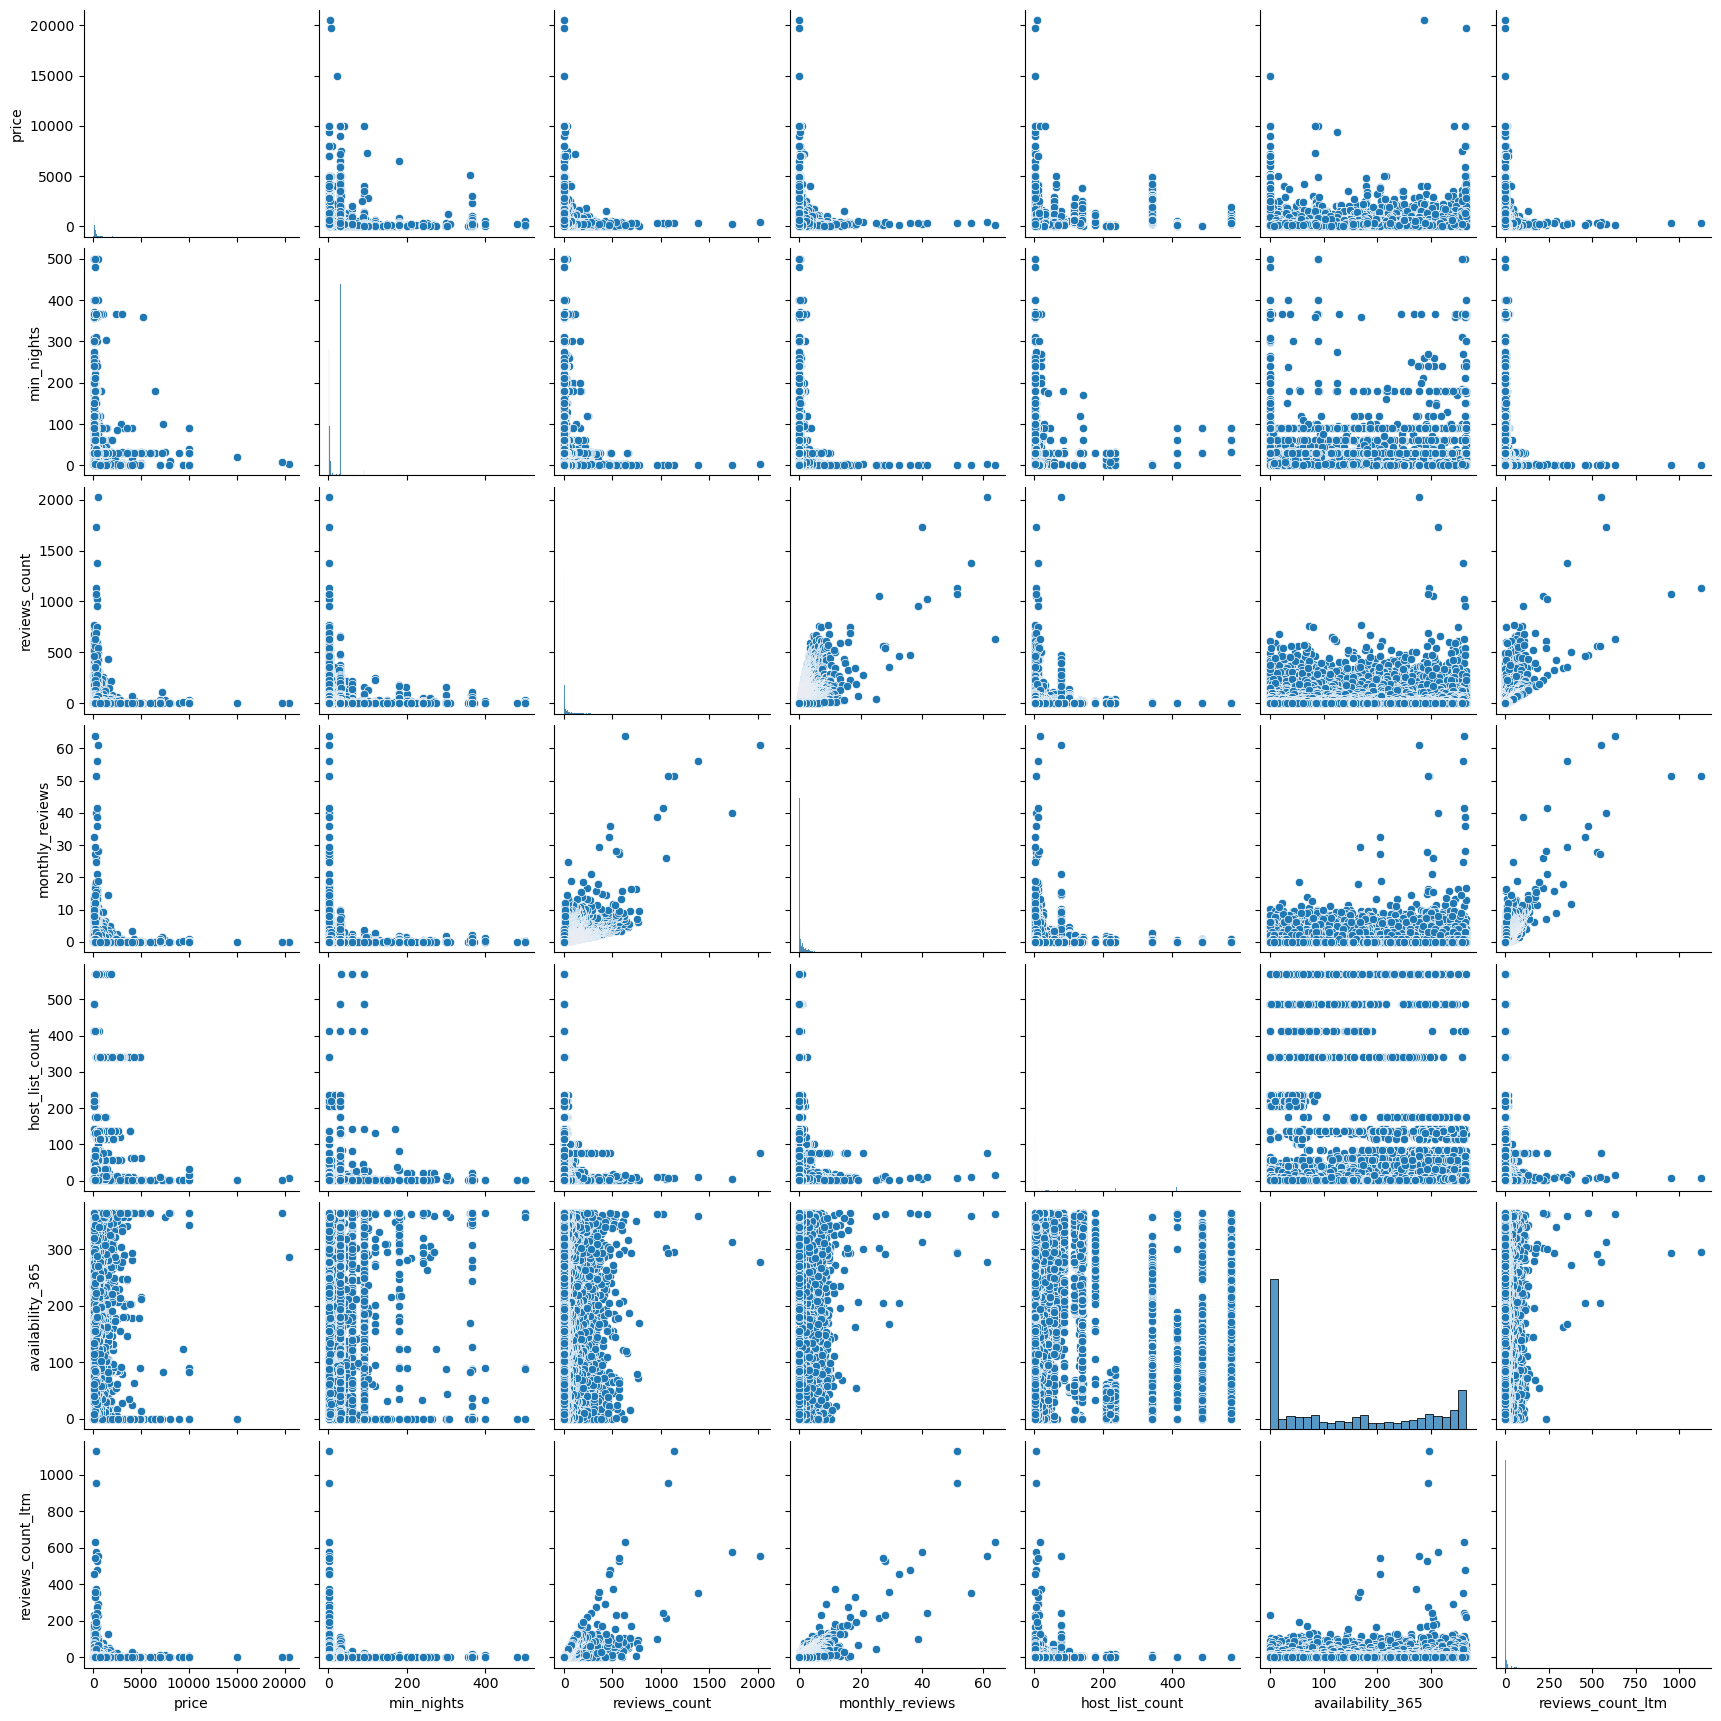

In [16]:
# generate dataframe pairplot
sns.pairplot(df_listings_sub)

### OBSERVATIONS:

Upon visualizing the pairplot of the numerical variables in the dataset, several key observations have emerged:

1. Outlier Presence and Distribution Skewness: As mentioned previously, a significant proportion of the numerical variables in the dataset contain outliers that cannot be precisely addressed. This results in a drastic skewness of the variable distributions, making it challenging to draw relevant insights from their values' distribution. Additionally, the presence of extreme values causes most data points to concentrate in the lower range of the plots, giving a "zoomed-out" perspective of the variability in the relationship between variables.

2. "L-Shape" Scatterplots: The majority of scatterplots exploring the relationships between variables exhibit an "L-shape" pattern with the values. This peculiar trend might be influenced by the presence of outliers and other unknown factors, which makes it a compelling area for further exploration to unravel the underlying reasons behind this behavior.

3. Weak Correlation Coefficients: Most of the relationships between numerical variables were found to have very weak correlation coefficients. Despite weak correlations, it is essential to emphasize that they can still offer meaningful insights and shed light on subtle connections that might not be immediately apparent. To gain a comprehensive understanding of these relationships, further exploration is warranted. Techniques such as data transformation, outlier analysis, subgroup analysis, or feature engineering could prove valuable in this endeavor.

### VARIABLES FOR FURTHER EXPLORATION:

Based on the pairplot analysis, certain variables have caught our attention and deserve closer examination to reveal potential insights. These variables are as follows:

1. The relationship between the total number of listings per host and availability (`'host_list_count'` / `'availability_365'`).
2. The relationship between price and the total number of listings per host (`'price'` / `'host_list_count'`).
3. The relationship between price and availability (`'price'` / `'availability_365'`).
4. The relationship between price and the minimum booked nights required (`'price'` / `'min_nights'`).
5. The relationship between monthly reviews and the minimum booked nights required (`'monthly_reviews'` / `'min_nights'`).
6. The relationship between monthly reviews and price (`'monthly_reviews'` / `'price'`).
7. The relationship between the minimum booked nights required and availability (`'min_nights'` / `'availability_365'`).

## DEFINE CATEGORICAL VARIABLE FROM `'availability_365'`

### CRITERIA

* If availability is one month or less, label as "Low availability".
* If availability is greater than one month but less than or equal to six months, label as "Moderate availability".
* If availability is greater than six months, label as "High availability".

In [17]:
# generate categorical variable based on criteria
df_listings.loc[df_listings['availability_365'] <= 30, 'availability_category'] = 'Low availability'
df_listings.loc[(df_listings['availability_365'] > 30) & (df_listings['availability_365'] <= 183), 'availability_category'] = 'Moderate availability'
df_listings.loc[df_listings['availability_365'] > 183, 'availability_category'] = 'High availability'

In [18]:
# display frequency counts
df_listings['availability_category'].value_counts()

Low availability         16746
High availability        15801
Moderate availability    11008
Name: availability_category, dtype: int64

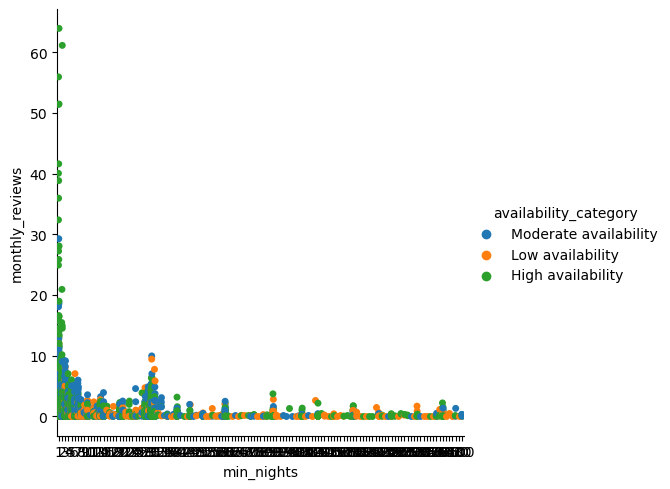

In [19]:
# generate catplot based on categorical variable
sns.catplot(x='min_nights', y='monthly_reviews', hue='availability_category', data=df_listings)

This categorical plot reveals that listings with high numbers of reviews and zero minimum nights for booking tend to exhibit the highest availability throughout the year, as evidenced by a distinct cluster of outliers falling into the "High availability" category on the left side of the graph. This finding suggests that these listings, which attract significant reviews and offer flexible booking options, enjoy consistent popularity and strong demand, making them appealing choices for potential guests seeking convenient and readily available accommodations.

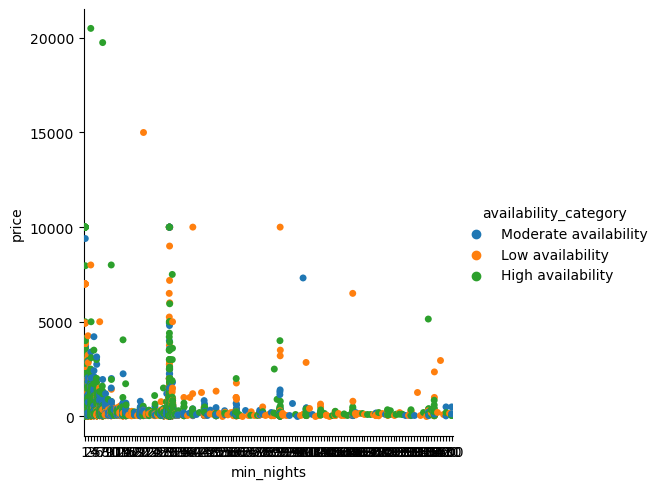

In [20]:
# generate catplot based on categorical variable
sns.catplot(x='min_nights', y='price', hue='availability_category', data=df_listings)

This scatterplot reveals that listings with an approximate of 30 minimum nights requirement for booking show an increase in price while remaining available for stays longer than 6 months. These listings, likely full apartments or houses, cater to guests seeking extended and potentially more luxurious stays in NYC. The correlation between minimum nights and price suggests hosts adjust pricing based on desired stay length, and the popularity of such listings indicates a demand for upscale accommodations for extended periods.

# RESEARCH QUESTIONS

1. What factors influence the price of Airbnb listings in New York City? (e.g., room type, neighborhood, number of reviews, availability)
    
    The relationship between the number of reviews and the price of listings appears to be extremely weak, indicating that the number of reviews does not have a substantial impact on the pricing of properties.

3. How does the minimum number of nights required for a stay affect the price of listings?
    
    Listings with a minimum required nights around 30 show increased prices and availability for stays longer than 6 months, suggesting their appeal to customers seeking extended accommodations, possibly full apartments or houses. Further investigation is needed to validate and refine this insight.

1. Can we identify distinct clusters of listings based on their attributes (e.g., price, room type, availability)?
    
    Upon initial analysis, a notable trend emerged: listings with high numbers of reviews and no minimum nights required for booking demonstrated the highest availability throughout the year. This finding suggests that such listings, attracting significant reviews and offering flexible booking options, enjoy consistent popularity and strong demand, making them attractive choices for potential guests seeking convenient and readily available accommodations. The correlation between high reviews and flexible booking options highlights their appeal to a wide range of travelers, contributing to their popularity in the competitive rental market.


# PROSPECTIVE HYPOTHESES

* The price of Airbnb listings in New York City is influenced by various factors such as room type, neighborhood, number of reviews, and availability. Specifically, certain room types and neighborhoods may command higher prices, and listings with more reviews and greater availability might be associated with different price ranges.

* As the minimum required booked nights increase, there is a corresponding decrease in the number of monthly reviews per listing.